## Projeto Machine Learning III

Autores:
- Ana Carolina Ferreira
- Diego Dio
- Fernando Brancher
- Marília Melo
- Mayara Medeiros

## Apresentação

**Objetivo:**

Criar modelos de classificação para prever se o tomador do empréstimo ficará inadimplente ou não.

Fonte de dados: https://www.kaggle.com/datasets/yasserh/loan-default-dataset

*Encontrei esse dicionário no projeto de outra pessoa, não é oficial, mas deve ajudar* (remover antes da apresnetação)

- **ID** = Customer ID of Applicant
- **year** = Year of Application
- **loan limit** = maximum avaliable amount of the loan allowed to be taken
- **Gender** = sex type
- **approv_in_adv** = Is loan pre-approved or not
- **loan_type** = Type of loan
- **loan_purpose** = the reason you want to borrow money
- **Credit_Worthiness** = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
- **open_credit** = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
- **business_or_commercial** = Usage type of the loan amount
- **loan_amount** = The exact loan amount
- **rate_of_interest** = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
- **Interest_rate_spread** = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
- **Upfront_charges** = Fee paid to a lender by a borrower as consideration for making a new loan
- **term** = the loan's repayment period
- **Neg_ammortization** = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
- **interest_only** = amount of interest only without principles
- **lump_sum_payment** = is an amount of money that is paid in one single payment rather than in installments.
- **property_value** = the present worth of future benefits arising from the ownership of the property
- **construction_type** = Collateral construction type
- **occupancy_type** = classifications refer to categorizing structures based on their usage
- **Secured_by** = Type of Collatoral
- **total_units** = number of unites
- **income** = refers to the amount of money, property, and other transfers of value received over a set period of time
- **credit_type** = type of credit
- **co-applicant_credit_type** = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
- **age** = applicant's age
- **submission_of_application** = Ensure the application is complete or not
- **LTV** = life-time value (LTV) is a prognostication of the net profit
- **Region** = applicant's place
- **Security_Type** = Type of Collatoral
- **status** = Loan status (Approved/Declined)
- **dtir1** = debt-to-income ratio (percentage of income that will be compromised with the loan)

In [94]:
# Rodar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

# Pré-Processamento
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, PowerTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer

# Instalar pacote missingno
# !pip install missingno
import missingno as msno

# Feature Selection
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV

# PCA
from sklearn.decomposition import PCA

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Métricas
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score, make_scorer

# Tunning hiperparâmetros
from hyperopt import Trials, fmin, hp

In [2]:
# Rodar
#Rodar uma vez, pra ele mostrar todas as colunas
pd.set_option('display.max_columns', 50)

## 1. Leitura, tratamento e padronização dos dados

In [3]:
# Rodar
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
print(df.shape)
df.info()

(148670, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges 

### Características do dataset:
- 148670 linhas
- 34 colunas
    - 1 coluna ID
    - 1 coluna target - Status
    - 21 colunas com dados categóricos
    - 11 colunas com dados numéricos
        - coluna ano com apenas um valor: 2019

### Análise Exploratória Inicial

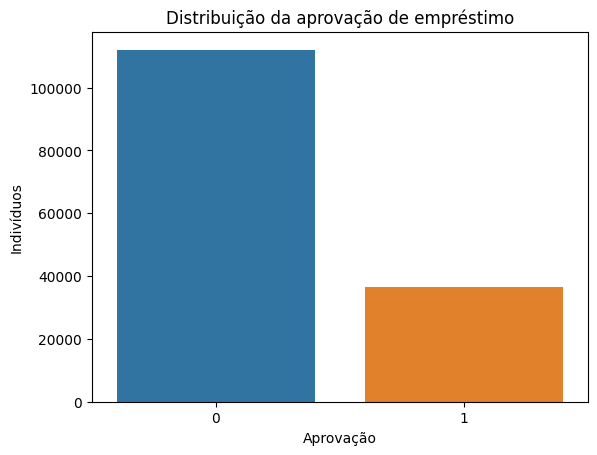

In [22]:
# Análise de balanceamento do target do dataset
sns.countplot(data=df, x='Status')
plt.title('Distribuição da aprovação de empréstimo')
plt.ylabel('Indivíduos')
plt.xlabel('Aprovação')
plt.show()

Nosso target ```Status``` é desbalanceado, podemos pensar em maneira de equilibrar a distribuição. 

Ideias:

- *Undersampling:* remover parte das observações da classe 0 para balancear. Sugestão, algo em torno de 60-40% acho que já seria OK.
- *Oversamplig:* criar dados sintéticos para a classe 1, até um o momento de criar uma distribuição mais balanceada.

Como temos um bom valor na classe 1, acredito que o *undersampling* já nos ajude, para evitar a criação de dados sintéticos.

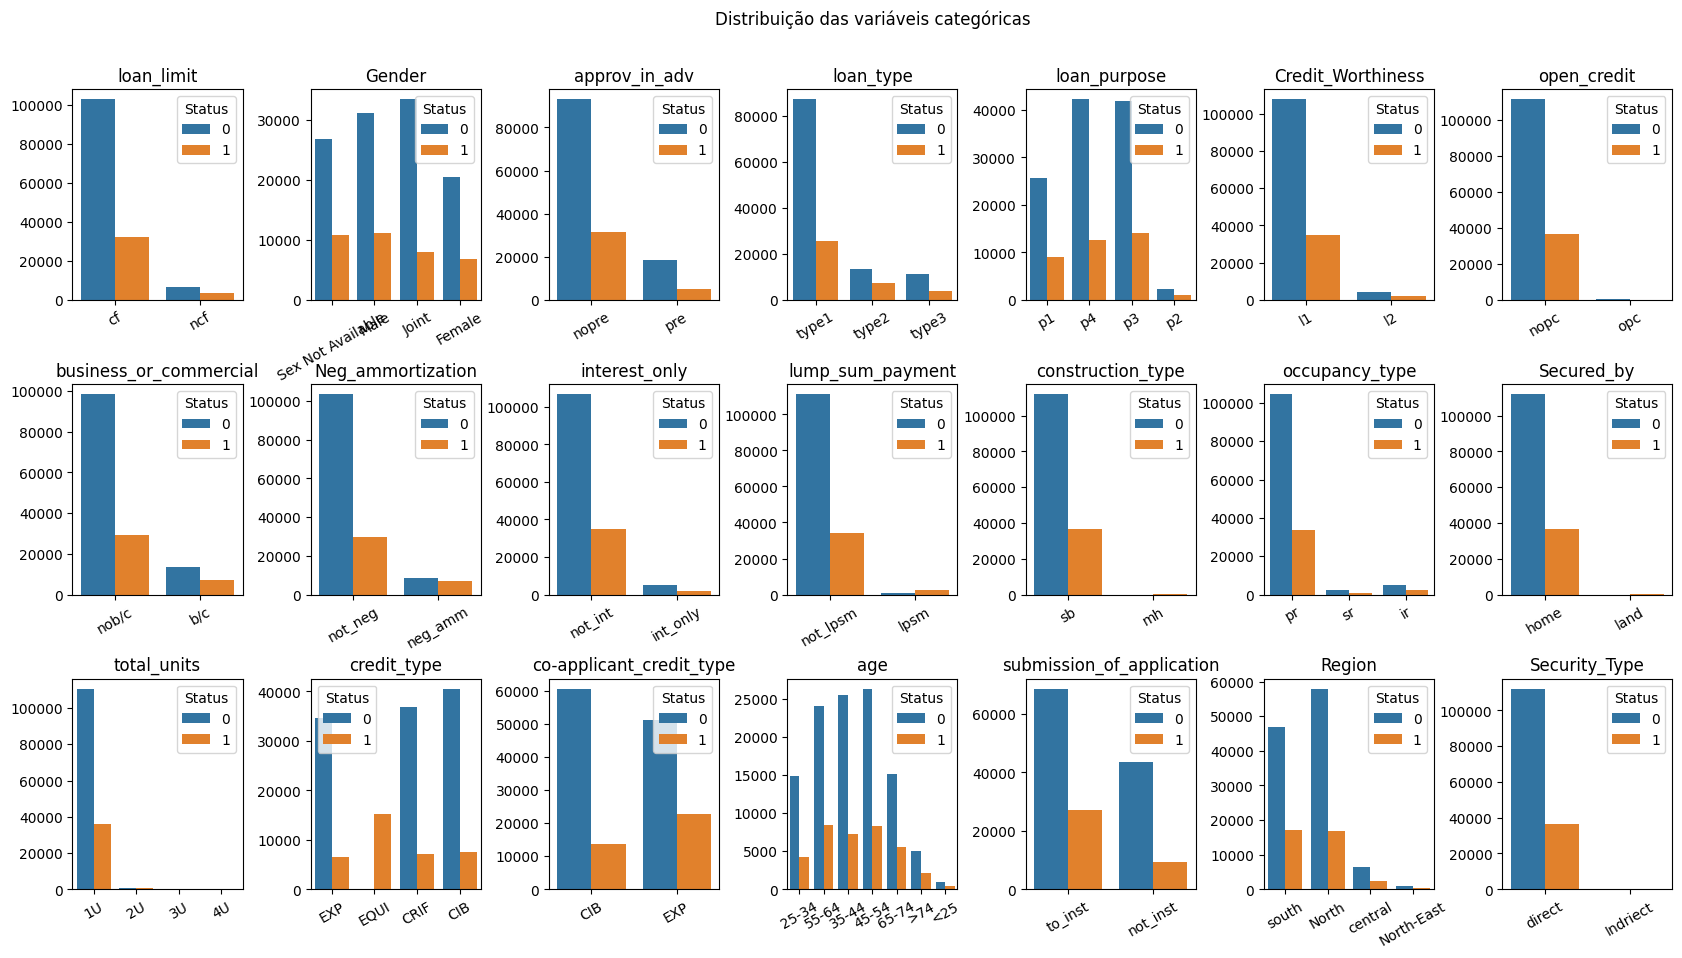

In [23]:
# Distribuição das variáveis categóricas
category_list = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
                 'Credit_Worthiness', 'open_credit', 'business_or_commercial',
                 'Neg_ammortization', 'interest_only', 'lump_sum_payment',
                 'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
                 'credit_type', 'co-applicant_credit_type', 'age',
                 'submission_of_application', 'Region', 'Security_Type']
count = 1
fig = plt.figure(figsize=(20,10))

for category in category_list:
    fig.add_subplot(3,7, count)
    sns.countplot(data = df,
                  x=category, 
                  hue='Status')
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(rotation=30)
    plt.title(category)
    count += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    
plt.suptitle('Distribuição das variáveis categóricas')
plt.show()

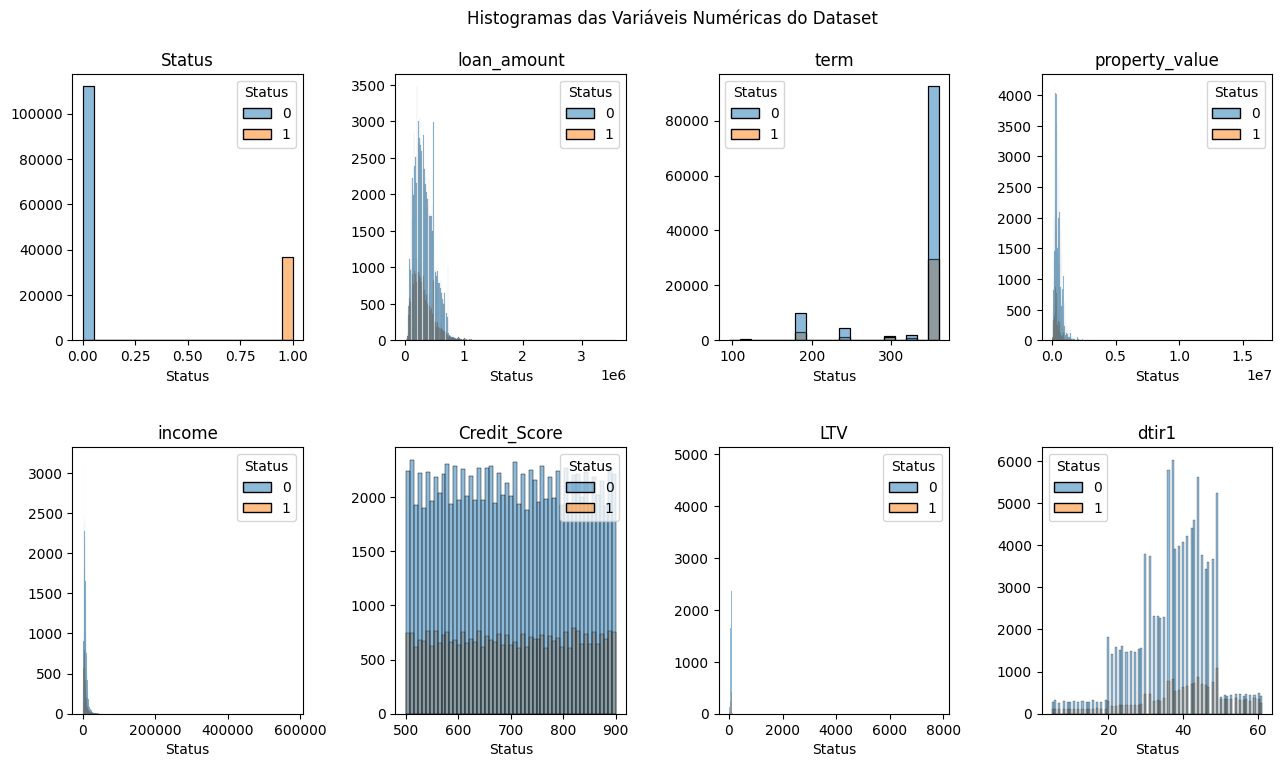

In [5]:
# Histograma das features
numeric_list = ['Status', 'loan_amount', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']

fig= plt.figure(figsize=(15,8))

for number, category in enumerate(numeric_list, start=1):
    ax = fig.add_subplot(2,4,number)
    sns.histplot(data=df, x=category, hue='Status')
    plt.title(category)
    plt.xlabel('Status')
    ax.set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Histogramas das Variáveis Numéricas do Dataset')
plt.show()

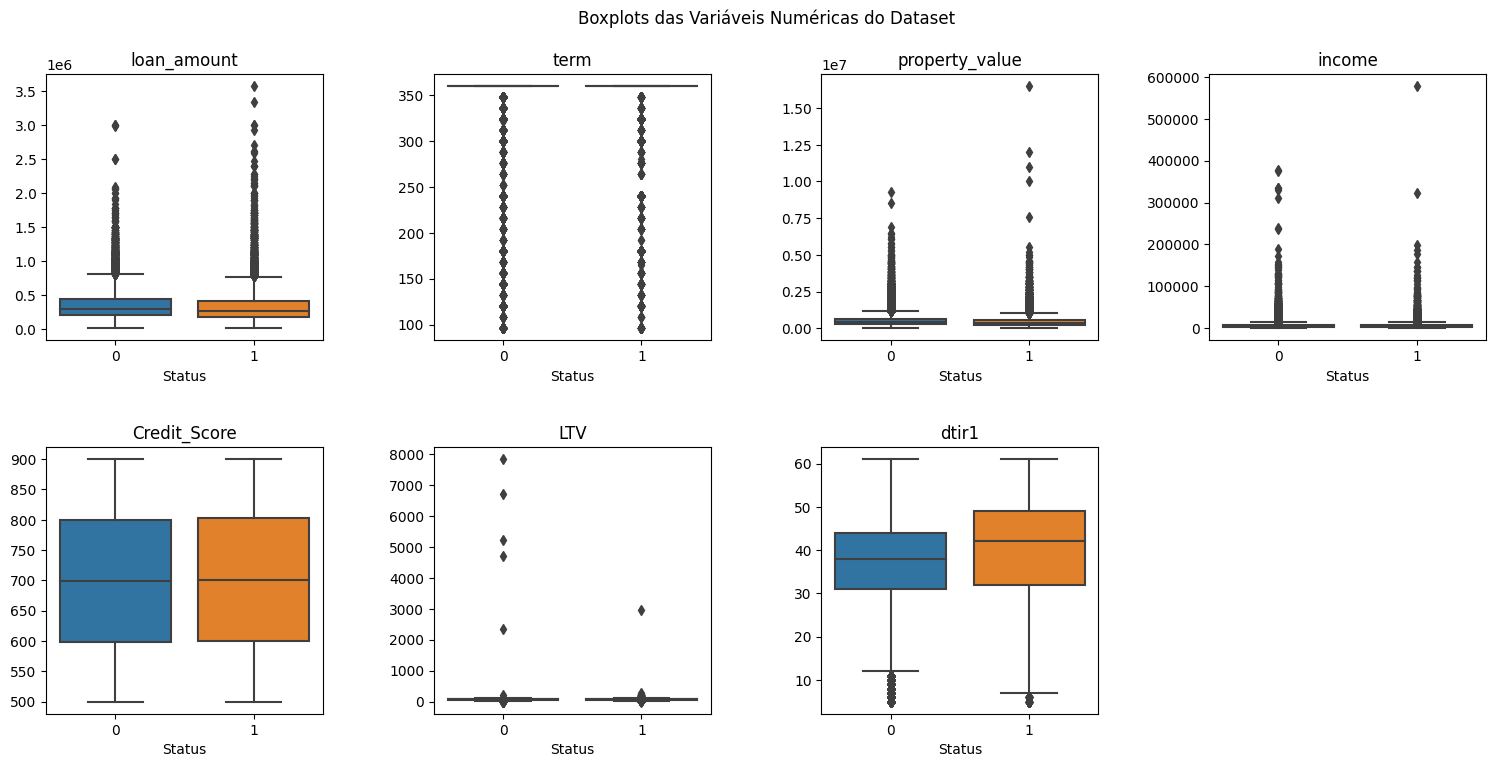

In [7]:
# Boxplot das features
numeric_list = ['loan_amount', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']

fig= plt.figure(figsize=(18,8))

for number, category in enumerate(numeric_list, start=1):
    ax = fig.add_subplot(2,4,number)
    sns.boxplot(data=df, y=category, x='Status')
    plt.title(category)
    plt.xlabel('Status')
    ax.set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Boxplots das Variáveis Numéricas do Dataset')
plt.show()

Analisando os dados expressos nos boxplots acima, além do fato de várias features apresentarem vários outliers, nenhuma distribuição se destaca.

Apenas ```dtir1``` tem uma leve disparidade no intervalo interquatil.

### Análise dos dados faltantes

In [4]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum().sort_values(ascending=False).head(15)

Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
property_value               15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
age                            200
loan_purpose                   134
Neg_ammortization              121
term                            41
Region                           0
dtype: int64

#### Visualização de dados faltantes separando por empréstimos aprovados e reprovados

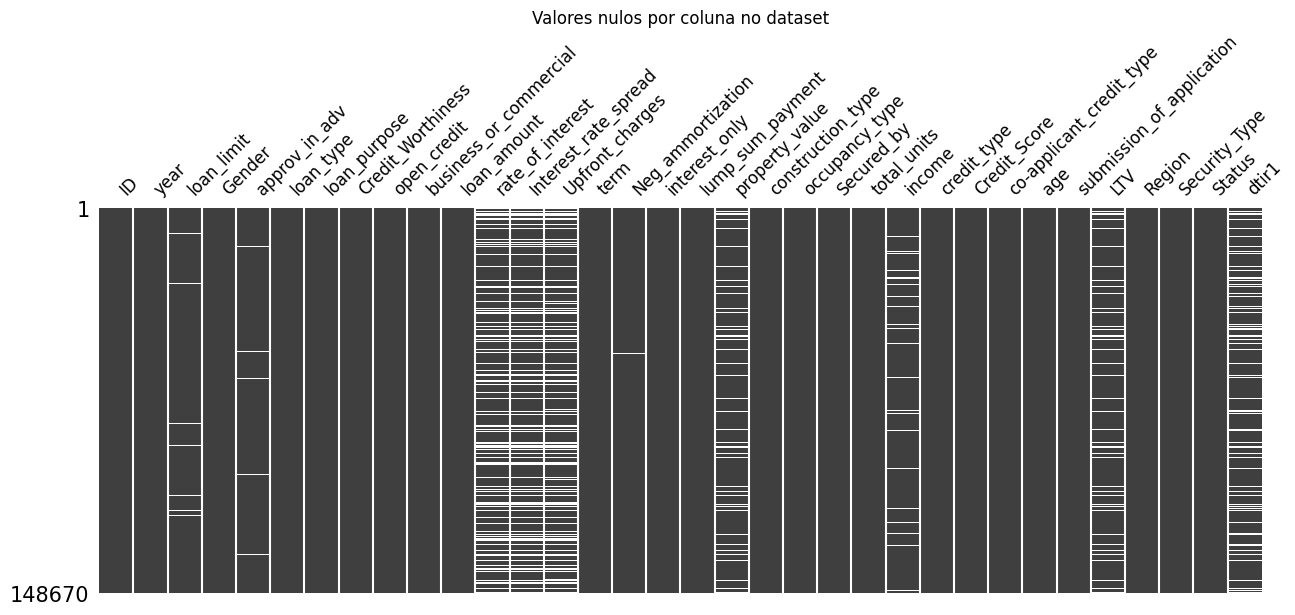

In [7]:
# Instalar pacote missingno
# pip install missingno

msno.matrix(df, figsize=(15, 5), fontsize=12, labels=True, sparkline=False)
plt.title('Valores nulos por coluna no dataset')
plt.show()

In [9]:
# Valores nulo quando Status = 0 ou = 1
df_status0 = df[df['Status'] == 0].copy()
df_status1 = df[df['Status'] == 1].copy()

indices_faltantes = list(df.isnull().sum().sort_values(ascending=False)[:14].index) #filtra apenas os que tem dados faltantes

indices = df_status1.isna().sum().index
valores_status0 = np.array(df_status0.isna().sum())
valores_status1 = np.array(df_status1.isna().sum())
df_valores_nulos = pd.DataFrame({'coluna': indices, 'Status 0': valores_status0, 'Status 1': valores_status1})
df_valores_nulos.loc[df_valores_nulos['coluna'].isin(indices_faltantes)]

,coluna,Status 0,Status 1
2,loan_limit,2463,881
4,approv_in_adv,667,241
6,loan_purpose,99,35
11,rate_of_interest,0,36439
12,Interest_rate_spread,0,36639
13,Upfront_charges,3156,36486
14,term,26,15
15,Neg_ammortization,89,32
18,property_value,2,15096
23,income,7911,1239


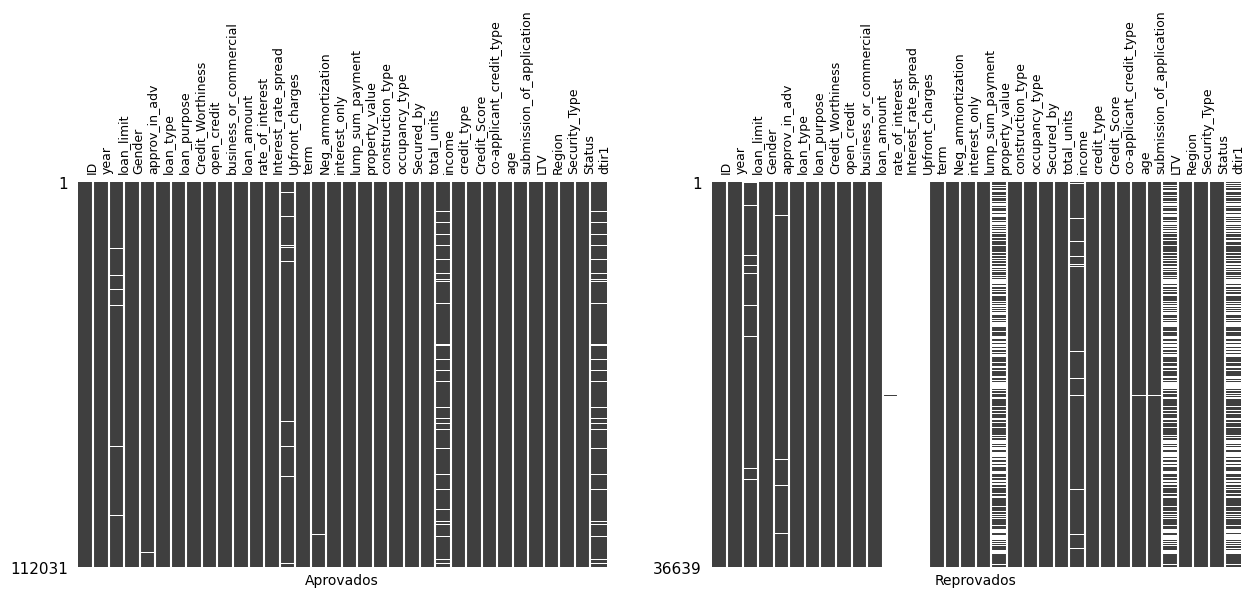

In [9]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
msno.matrix(df_status0, fontsize=9, labels=True, sparkline=False, ax=ax1)
plt.xlabel('Aprovados')
plt.xticks(rotation=90)

ax2 = fig.add_subplot(1,2,2)
msno.matrix(df_status1, fontsize=9, labels=True, sparkline=False, ax=ax2)
plt.xlabel('Reprovados')
plt.xticks(rotation=90)

plt.show()

In [29]:
def porcentagem_nulos(df):
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing = {}
    nulls_list = []
    pct_list = []

    for col in missing_columns:
        nulls = df[col].isnull().sum()
        pct = (nulls/df.shape[0]) * 100
        
        nulls_list.append(nulls)
        pct_list.append(str(round(pct, 2)) + '%')
        
        missing['Nulos'] = nulls_list
        missing['Porcentagem'] = pct_list

    return pd.DataFrame(missing, index=missing_columns)


In [32]:
print('Valores nulos para cada coluna e porcentagem para dataset total, somente "Status = 0" e somente "Status = 1"')
pd.concat([porcentagem_nulos(df), porcentagem_nulos(df_status0), porcentagem_nulos(df_status1)], axis=1)

Valores nulos para cada coluna e porcentagem para dataset total, somente "Status = 0" e somente "Status = 1"


,Nulos,Porcentagem,Nulos,Porcentagem,Nulos,Porcentagem
loan_limit,3344,2.25%,2463.0,2.2%,881,2.4%
approv_in_adv,908,0.61%,667.0,0.6%,241,0.66%
loan_purpose,134,0.09%,99.0,0.09%,35,0.1%
rate_of_interest,36439,24.51%,NaN,NaN,36439,99.45%
Interest_rate_spread,36639,24.64%,NaN,NaN,36639,100.0%
Upfront_charges,39642,26.66%,3156.0,2.82%,36486,99.58%
term,41,0.03%,26.0,0.02%,15,0.04%
Neg_ammortization,121,0.08%,89.0,0.08%,32,0.09%
property_value,15098,10.16%,2.0,0.0%,15096,41.2%
income,9150,6.15%,7911.0,7.06%,1239,3.38%


Analisando as informações acima, observamos que:
- Em ```rate_of_interest```, ```Interest_rate_spread```, ```Upfront_charges``` os dados nulos configuram >99% da coluna para **Status 1** (Reprovados)
- Em , ```property_value```, ```LTV``` e ```dtir1``` os nulos configuram ~40% da coluna para **Status 1** (Reprovados)
- As demais colunas com dados faltantes apresentam distribuições similares entre **Status 0** e **Status 1**

Podemos observar que os valores faltantes nas colunas 'rate_of_interest', 'interest_rate_spread' e 'Upfront_charges' estão fortemente ligadas ao Status de aprovação do empréstimo. Portanto, avaliamos possivelmente se tratarem de valores relacionados a processos pós-aprovação e decidimos por excluir essas colunas.

#### Tratamento dados faltantes

In [33]:
# Rodar
# Drop de colunas de ID, não informativas ou colunas que configuram 99% de dados faltantes para Status 1
df.drop(columns=['ID', 'year','rate_of_interest', 'Interest_rate_spread', 'Upfront_charges'], inplace=True)

# Drop de dados faltantes em colunas com menos de 5% dos dados totais e similarmente distribuidos entre Status 0 e Status 1
df.dropna(subset=['loan_limit', 'approv_in_adv', 'loan_purpose', 'term', 'Neg_ammortization', 'age', 'submission_of_application'], inplace=True) 

# Tratamento das colunas com ~40% dos dados faltantes, KNN Imputer
imputer = KNNImputer(n_neighbors = 2)
df[['income','property_value','LTV','dtir1']] = imputer.fit_transform(df[['income','property_value','LTV','dtir1']])

df.shape

(143942, 29)

**Um pouco sobre o KNN Imputer**

Como ele funciona:

<img src='https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Fe517b2b2-aa4d-4ad2-9f71-ad068c4db993_3115x1744.png' width='500'>

Por que usá-lo?

<img src='https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F0d8bb4da-0c62-4492-8dfd-b30f5530d8ca_2973x3153.jpeg' width='450'>

Para saber mais: [Clique aqui](https://www.blog.dailydoseofds.com/p/the-most-overlooked-problem-with-768?utm_source=post-email-title&publication_id=1119889&post_id=135561523&isFreemail=true&utm_medium=email)

Análise da quantidade de dados:

|                      | **Linhas** | **Colunas** |
|----------------------|:----------:|:-----------:|
| Antes do tratamento  |   148.670  |      34     |
| Depois do tratamento |   143.942  |      29     |

Apesar de vários tratamentos e alguns drops, nesse tratamento foram removidos cerca de 3% dos dados, a maioria nulos.

In [34]:
# Dataset sem dados nulos (rever implementação do KNN para remover esses dados abaixo )
df.isnull().sum().sort_values(ascending=False).head(5)

loan_limit        0
occupancy_type    0
Status            0
Security_Type     0
Region            0
dtype: int64

In [35]:
# Rodar
# Subsample dos dados com status = 0

# separa novamente de acordo com os status
df_status0s = df[df['Status'] == 0].copy()
df_status1s = df[df['Status'] == 1].copy()

df_filter_status0 = df_status0s.sample(frac=0.35)
df_sample = pd.concat([df_filter_status0, df_status1s])
df_sample['Status'].value_counts()

Status
0    38040
1    35255
Name: count, dtype: int64

In [36]:
# Rodar
X = df_sample.drop(columns='Status')
y = df_sample['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Encoding dos dados

In [37]:
# Rodar
# Separando as features de acordo com os tratamentos

# Features categóricas nominais: 
features_cat = list(df.select_dtypes(exclude=np.number).columns)
features_cat.remove('total_units')
features_cat.remove('age')

# Define a ordem para o OrdinalEncoder
units_order = ['1U', '2U', '3U', '4U']
age_order = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '>74']
# Features categóricas ordinais: 
features_ord = ['total_units','age']

# Features numéricas:
features_num = list(df.select_dtypes(include=np.number).columns)
features_num.remove('Status')

In [38]:
# Rodar
# Aplicando as transformações

#pipe_feat_num = Pipeline([
#    ('pw_transf', PowerTransformer()), # Considerar PowerTransformer() (sklearn.preprocessing) para transformar os dados numa escala Log e corrigir a skwedness.
#    ('input_num', KNNImputer(n_neighbors = 2)) # Opção 2: ('input_num', SimpleImputer(strategy = "mean")) (troquei pra knnimputer)    
#])

# Aplica cada transformação nas respectivas colunas
pre_processamento = ColumnTransformer([
        ('transf_cat', OneHotEncoder(drop='first', sparse_output=False), features_cat),
        ('transf_ord', OrdinalEncoder(categories=[units_order, age_order]), features_ord),
        ('transf_num', PowerTransformer(), features_num)
], remainder='passthrough')

# Para que o output seja um dataframe do pandas
pre_processamento.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('transf_cat',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['loan_limit', 'Gender', 'approv_in_adv',
                                  'loan_type', 'loan_purpose',
                                  'Credit_Worthiness', 'open_credit',
                                  'business_or_commercial', 'Neg_ammortization',
                                  'interest_only', 'lump_sum_payment',
                                  'construction_type', 'occupancy_type',
                                  'Secured_by', 'credit_type',
                                  'co-applicant_credit_type',
                                  'submission_of_application', 'Region',
                                  'Security_Type']),
                                ('transf_ord',
                                 OrdinalEncoder(categories=[['1U', '2U', '3U',
                                                             '4U'],
                                                            ['<25', '25-34',
                                                             '35-44', '45-54',
                                                             '55-64', '65-74',
                                                             '>74']]),
                                 ['total_units', 'age']),
                                ('transf_num', PowerTransformer(),
                                 ['loan_amount', 'term', 'property_value',
                                  'income', 'Credit_Score', 'LTV', 'dtir1'])])

In [39]:
# Rodar
# Column Transform: dados de treino
X_train_transformed = pre_processamento.fit_transform(X_train)

new_columns = list(X_train_transformed.columns)
for column in range(len(new_columns)):
    new_columns[column] = new_columns[column][12:]

X_train_transformed.columns = new_columns

X_train_transformed.head(2)

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct,total_units,age,loan_amount,term,property_value,income,Credit_Score,LTV,dtir1
103596,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.411991,0.470847,-0.658555,-0.785345,-1.40940,0.598245,0.428315
141823,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.154486,0.470847,0.194161,0.961316,-1.51183,-0.138305,-1.518040


In [40]:
# Rodar
# Column Transform: dados de teste
X_test_transformed = pre_processamento.transform(X_test)

new_columns = list(X_test_transformed.columns)
for column in range(len(new_columns)):
    new_columns[column] = new_columns[column][12:]

X_test_transformed.columns = new_columns

X_test_transformed.head(2)

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct,total_units,age,loan_amount,term,property_value,income,Credit_Score,LTV,dtir1
121096,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.693460,0.470847,1.829477,0.161933,-0.101846,-2.232148,-0.270249
148577,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5.0,0.862008,0.470847,2.014048,-0.297541,0.604873,-2.288302,1.777428


In [41]:
X_train_transformed.describe()

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct,total_units,age,loan_amount,term,property_value,income,Credit_Score,LTV,dtir1
count,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,58636.000000,5.863600e+04,5.863600e+04,5.863600e+04,5.863600e+04,5.863600e+04,5.863600e+04,5.863600e+04
mean,0.074715,0.259414,0.291476,0.264599,0.152347,0.153506,0.100638,0.024064,0.377635,0.365936,0.047838,0.003496,0.846494,0.879067,0.950628,0.960536,0.999505,0.926717,0.021147,0.000495,0.263422,0.199127,0.248278,0.538014,0.675916,0.008868,0.058803,0.439474,0.999505,0.024490,3.167184,3.451772e-16,5.568156e-16,-8.557631e-16,1.527456e-16,1.275768e-15,-8.591561e-17,2.381159e-17
std,0.262933,0.438317,0.454446,0.441123,0.359360,0.360478,0.300851,0.153248,0.484800,0.481696,0.213424,0.059025,0.360478,0.326052,0.216646,0.194697,0.022234,0.260602,0.143877,0.022234,0.440493,0.399347,0.432017,0.498557,0.468036,0.093754,0.235258,0.496327,0.022234,0.210204,1.425182,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.724140e+00,-2.280166e+00,-6.004876e+00,-3.452996e+00,-1.775408e+00,-6.173555e+00,-2.380222e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,-7.235285e-01,4.708467e-01,-6.585549e-01,-5.756551e-01,-8.519500e-01,-4.657179e-01,-7.259081e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,4.088506e-02,4.708467e-01,9.362528e-03,-4.069808e-02,1.042169e-02,1.599088e-01,2.073298e-02
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,7.367375e-01,4.708467e-01,6.490337e-01,5.186606e-01,8.713322e-01,6.656814e-01,6.402508e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,5.662589e+00,4.708467e-01,6.163424e+00,1.597025e+01,1.684841e+00,5.822928e+01,2.518705e+00


In [42]:
#Fazer a análise nos dados de treino
treino = pd.concat([X_train_transformed, y_train], axis=1)

print(treino.shape)

(58636, 39)


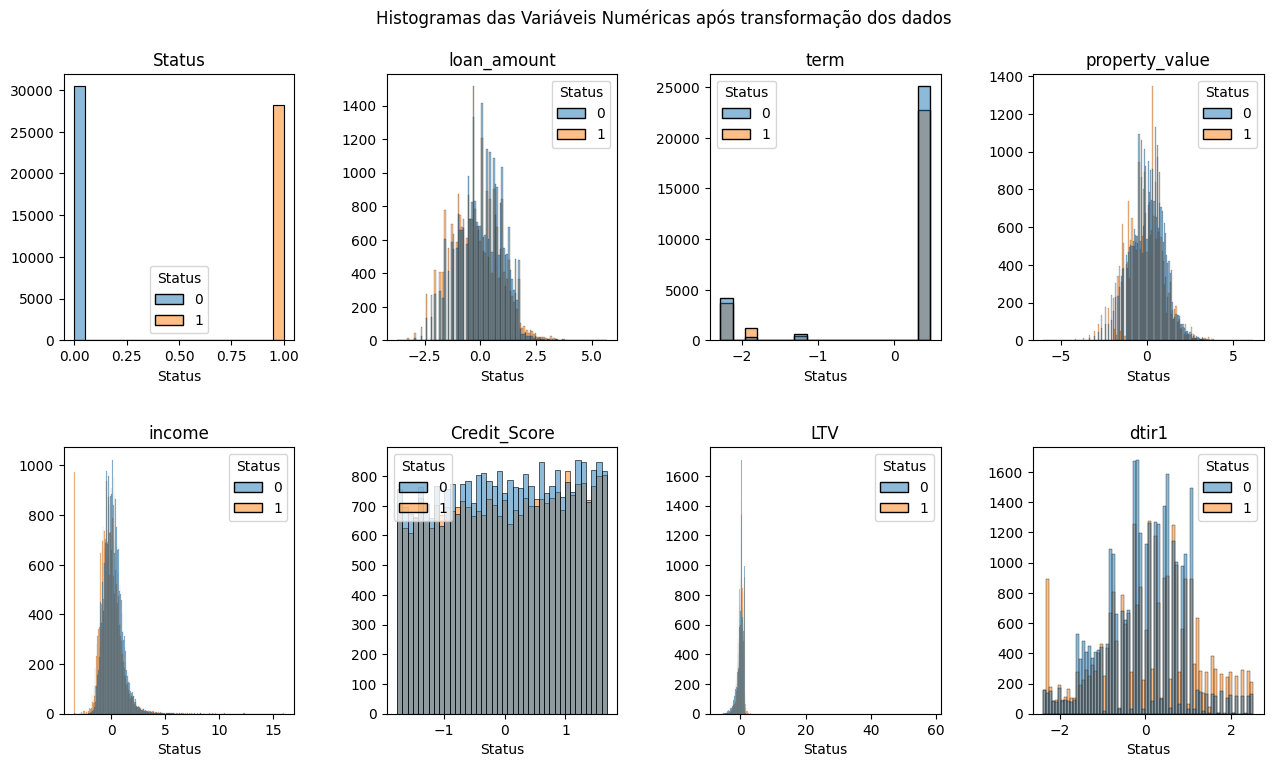

In [43]:
# Histograma das features
numeric_list = ['Status', 'loan_amount', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']

fig= plt.figure(figsize=(15,8))

for number, category in enumerate(numeric_list, start=1):
    ax = fig.add_subplot(2,4,number)
    sns.histplot(data=treino, x=category, hue='Status')
    plt.title(category)
    plt.xlabel('Status')
    ax.set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Histogramas das Variáveis Numéricas após transformação dos dados')
plt.show()

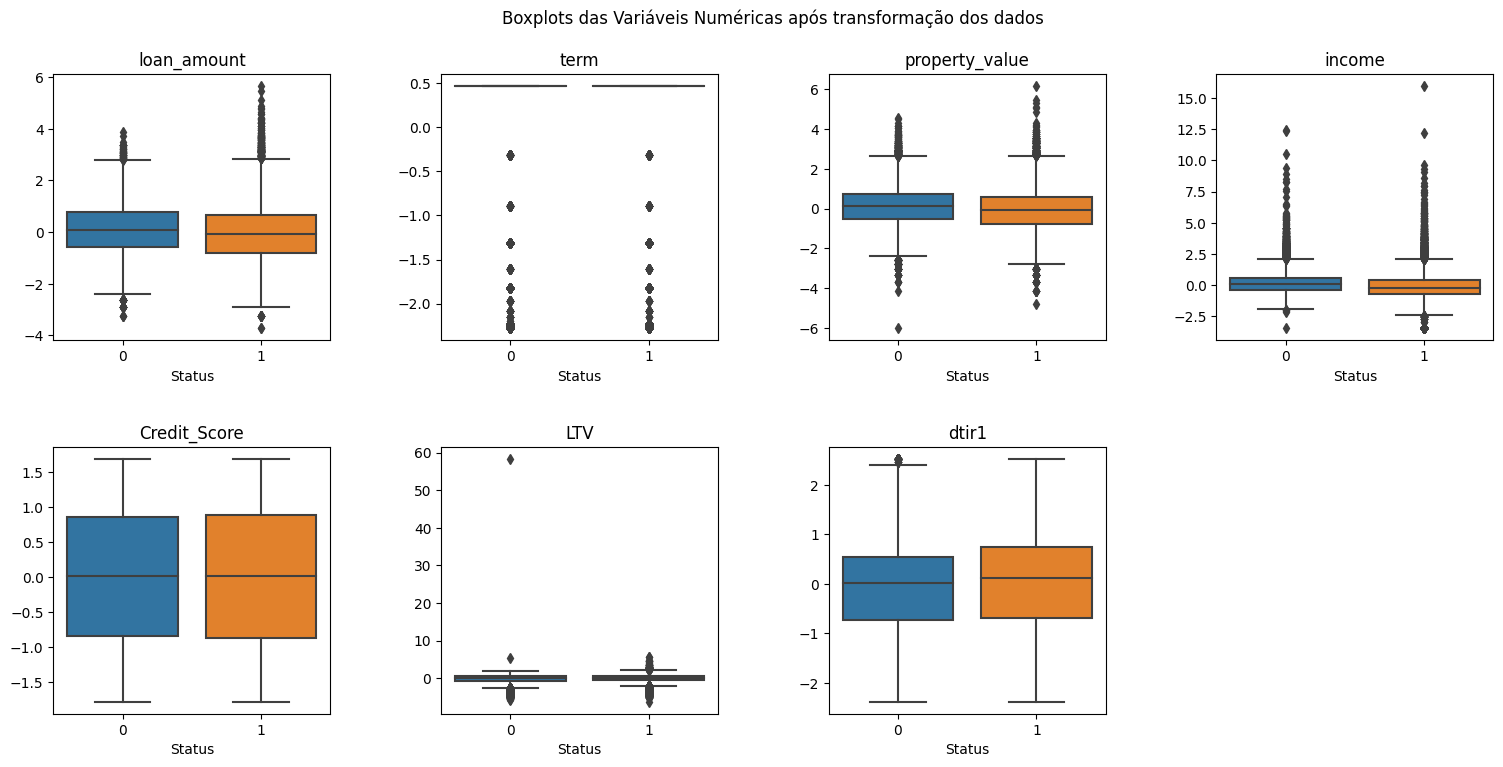

In [44]:
# Boxplot das features
numeric_list = ['loan_amount', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']

fig= plt.figure(figsize=(18,8))

for number, category in enumerate(numeric_list, start=1):
    ax = fig.add_subplot(2,4,number)
    sns.boxplot(data=treino, y=category, x='Status')
    plt.title(category)
    plt.xlabel('Status')
    ax.set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Boxplots das Variáveis Numéricas após transformação dos dados')
plt.show()

In [45]:
# Rodar apenas no final de todas as análises
sns.pairplot(data=treino, hue='Status')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001500C8F3E20> (for post_execute):


KeyboardInterrupt: 

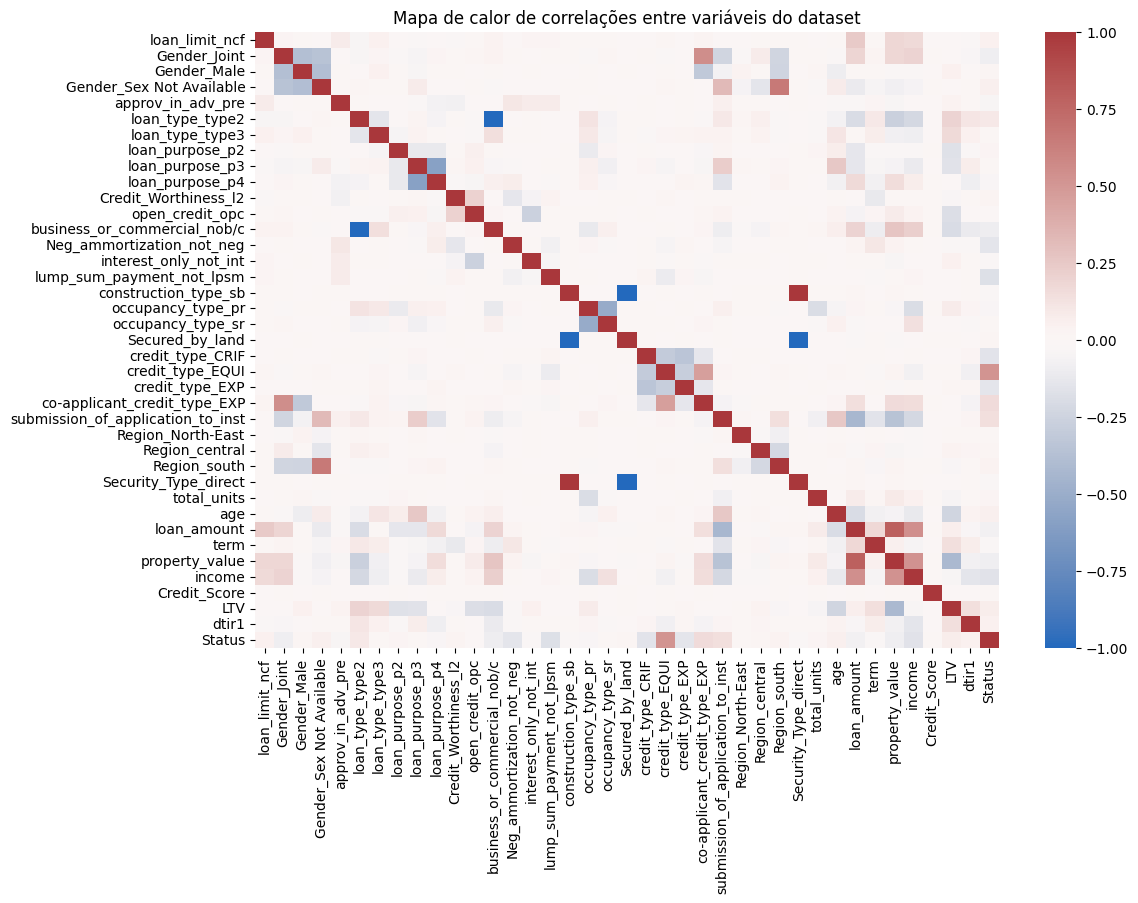

In [47]:
# Correlação e heatmap das features e target
plt.figure(figsize=(12,8))
sns.heatmap(treino.corr(), cmap='vlag')
plt.title('Mapa de calor de correlações entre variáveis do dataset')
plt.xticks(rotation=90)
plt.show()

### Seleção de Features

- Lasso

In [48]:
estimador_lasso = Lasso(random_state=42)

estimador_lasso.fit(X_train_transformed, y_train)

estimador_lasso.coef_

array([ 0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,
       -0., -0., -0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.])

- Permutation Importance

In [49]:
estimador = DecisionTreeClassifier().fit(X_train_transformed, y_train)

permutacao = permutation_importance(estimador, X_test_transformed, y_test, random_state=42)

In [50]:
dados = {
    'importancia': permutacao.importances_mean,
    'std': permutacao.importances_std
}

importancia = pd.DataFrame(dados, index=estimador.feature_names_in_).sort_values(by='importancia', ascending=False)#.head(10)
importancia

,importancia,std
credit_type_EQUI,0.134648,0.001520
income,0.056621,0.001483
LTV,0.050413,0.002636
dtir1,0.034232,0.002191
loan_amount,0.026318,0.002299
loan_purpose_p3,0.020111,0.001429
submission_of_application_to_inst,0.019265,0.001380
property_value,0.018828,0.001028
co-applicant_credit_type_EXP,0.014094,0.000762
loan_type_type2,0.013507,0.001368


Adotaremos valor de corte para selecionar as Features, aquelas que tiveram importância superior ou igual a 0.01

- RFECV

In [52]:
# Tentei ajustar o valor de max_iter porque ao rodar aparecia o aviso.
# Cheguei a 600 e continua mostrando o aviso. Cuidar ao rodar ou mudar o max_iter,
# pq aumenta bastante tbm o tempo de processamento quanto maior o valor.
estimador_rfecv = LogisticRegression(max_iter=600)
rfecv = RFECV(estimador_rfecv, cv=5, verbose=1, n_jobs=-1)

rfecv.fit(X_train_transformed, y_train)

Fitting estimator with 38 features.
Fitting estimator with 37 features.


RFECV(cv=5, estimator=LogisticRegression(max_iter=600), n_jobs=-1, verbose=1)

In [53]:
# Mesmo mudando o max_iter, as features não mudaram
rfecv.n_features_

36

In [54]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True])

- Seguiremos com a feature selection através do método de permutation importance

In [69]:
# Rodar
X_train_ftselec = X_train_transformed.drop(columns=list(importancia[importancia['importancia'] < 0.01].index))

X_test_ftselec = X_test_transformed.drop(columns=list(importancia[importancia['importancia'] < 0.01].index))

print(X_train_ftselec.shape)
print(X_test_ftselec.shape)

(58636, 13)
(14659, 13)


### PCA

In [71]:
pca = PCA(random_state=42)
pca.fit(X_train_ftselec)

PCA(random_state=42)

In [72]:
pca.explained_variance_ratio_

array([0.38027584, 0.18972131, 0.15185965, 0.0839389 , 0.04822198,
       0.03855071, 0.02485696, 0.0204087 , 0.01723171, 0.0154047 ,
       0.01204509, 0.0115537 , 0.00593076])

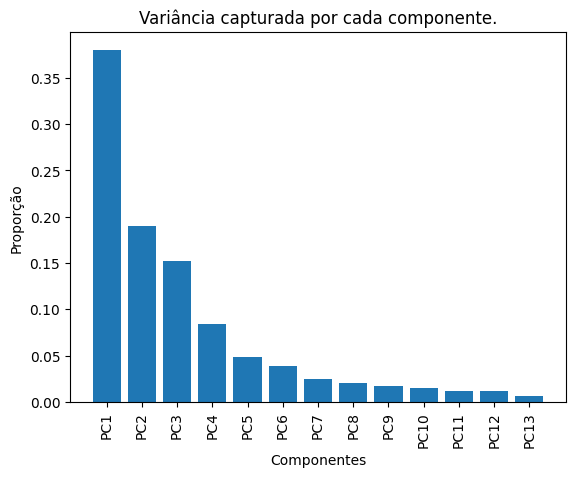

In [73]:
labels = [f'PC{i+1}' for i in range(pca.n_components_)]
plt.bar(labels, pca.explained_variance_ratio_)
plt.title("Variância capturada por cada componente.")
plt.xlabel('Componentes')
plt.ylabel('Proporção')
plt.xticks(rotation=90)
plt.show()

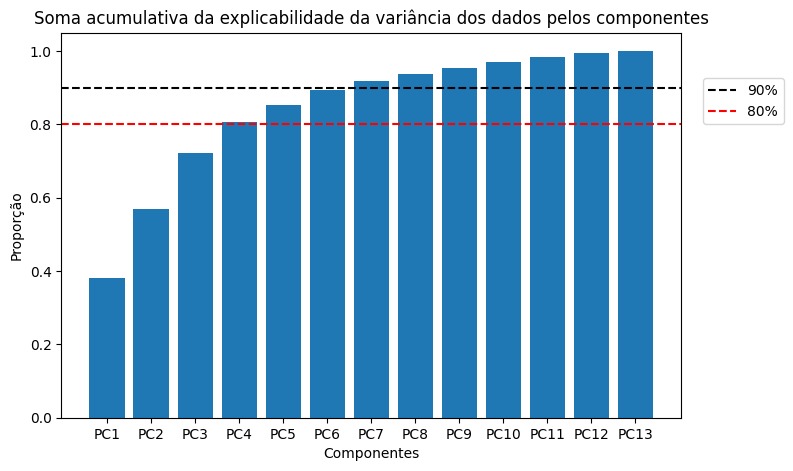

In [74]:
# Utilizando o modelo com os 10 componentes do PCA
plt.figure(figsize=(8,5))
labels = [f'PC{i+1}' for i in range(pca.n_components_)]
plt.bar(labels, pca.explained_variance_ratio_.cumsum())
plt.axhline(y=0.9, color='k', linestyle= '--', label="90%")
plt.axhline(y=0.8, color='r', linestyle= '--', label="80%")
plt.legend(bbox_to_anchor = (1.1, 0.9), loc = 'upper center')
plt.title("Soma acumulativa da explicabilidade da variância dos dados pelos componentes")
plt.xlabel('Componentes')
plt.ylabel('Proporção')
plt.show()

#### Transform do PCA

In [79]:
# Rodar
# Cria e fita o PCA
pca_final = PCA(n_components = 6, random_state=42)
pca_final.fit(X_train_ftselec)

# Transforma as features do dataset de treino nas features do PCA
X_train_pca = pca_final.transform(X_train_ftselec)

# Cria um dataframe, onde agora as features são o componentes do pca_final
labels_pca_final = [f"PC{i+1}" for i in range(pca_final.n_components_)]
X_train_pca = pd.DataFrame(X_train_pca, columns=labels_pca_final)

X_train_pca.shape

(58636, 6)

In [80]:
# Rodar
#Aplica o PCA nos dados de teste e cria o dataset
X_test_pca = pca_final.transform(X_test_ftselec)
X_test_pca = pd.DataFrame(X_test_pca, columns=labels_pca_final)

X_test_pca.shape

(14659, 6)

### Tratamento dataset para Machine Learning

### Modelos

- Logistic Regression

In [88]:
# Modelo somente com Feature Selection
model_log = LogisticRegression()
model_log.fit(X_train_ftselec, y_train)
y_pred_logtest = model_log.predict(X_test_ftselec)
y_pred_logtrain = model_log.predict(X_train_ftselec)

print('Classification Report - Treino')
print(classification_report(y_train, y_pred_logtrain))

print('\nClassification Report - Teste')
print(classification_report(y_test, y_pred_logtest))

Classification Report - Treino
              precision    recall  f1-score   support

           0       0.71      0.91      0.80     30432
           1       0.86      0.60      0.71     28204

    accuracy                           0.76     58636
   macro avg       0.79      0.75      0.75     58636
weighted avg       0.78      0.76      0.75     58636


Classification Report - Teste
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      7608
           1       0.86      0.59      0.70      7051

    accuracy                           0.76     14659
   macro avg       0.78      0.75      0.75     14659
weighted avg       0.78      0.76      0.75     14659



In [89]:
# Modelo com Feature Selection e PCA
model_log = LogisticRegression()
model_log.fit(X_train_pca, y_train)
y_pred_logtest = model_log.predict(X_test_pca)
y_pred_logtrain = model_log.predict(X_train_pca)

print('Classification Report - Treino')
print(classification_report(y_train, y_pred_logtrain))

print('\nClassification Report - Teste')
print(classification_report(y_test, y_pred_logtest))

Classification Report - Treino
              precision    recall  f1-score   support

           0       0.65      0.71      0.68     30432
           1       0.65      0.59      0.62     28204

    accuracy                           0.65     58636
   macro avg       0.65      0.65      0.65     58636
weighted avg       0.65      0.65      0.65     58636


Classification Report - Teste
              precision    recall  f1-score   support

           0       0.66      0.72      0.68      7608
           1       0.66      0.59      0.63      7051

    accuracy                           0.66     14659
   macro avg       0.66      0.66      0.65     14659
weighted avg       0.66      0.66      0.66     14659



- Random Forest

In [90]:
# Modelo somente com Feature Selection
model_rfc = RandomForestClassifier()

model_rfc.fit(X_train_ftselec, y_train)
y_pred_rfctrain = model_rfc.predict(X_train_ftselec)
y_pred_rfctest = model_rfc.predict(X_test_ftselec)

print('Classification Report - Treino')
print(classification_report(y_train, y_pred_rfctrain))

print('\nClassification Report - Teste')
print(classification_report(y_test, y_pred_rfctest))

Classification Report - Treino
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30432
           1       1.00      0.99      1.00     28204

    accuracy                           1.00     58636
   macro avg       1.00      1.00      1.00     58636
weighted avg       1.00      1.00      1.00     58636


Classification Report - Teste
              precision    recall  f1-score   support

           0       0.77      0.87      0.81      7608
           1       0.83      0.72      0.77      7051

    accuracy                           0.79     14659
   macro avg       0.80      0.79      0.79     14659
weighted avg       0.80      0.79      0.79     14659



In [91]:
# Modelo com Feature Selection e PCA
model_rfc = RandomForestClassifier()

model_rfc.fit(X_train_pca, y_train)
y_pred_rfctest = model_log.predict(X_test_pca)
y_pred_rfctrain = model_log.predict(X_train_pca)

print('Classification Report - Treino')
print(classification_report(y_train, y_pred_rfctrain))

print('\nClassification Report - Teste')
print(classification_report(y_test, y_pred_rfctest))

Classification Report - Treino
              precision    recall  f1-score   support

           0       0.65      0.71      0.68     30432
           1       0.65      0.59      0.62     28204

    accuracy                           0.65     58636
   macro avg       0.65      0.65      0.65     58636
weighted avg       0.65      0.65      0.65     58636


Classification Report - Teste
              precision    recall  f1-score   support

           0       0.66      0.72      0.68      7608
           1       0.66      0.59      0.63      7051

    accuracy                           0.66     14659
   macro avg       0.66      0.66      0.65     14659
weighted avg       0.66      0.66      0.66     14659



- XGBoost

In [92]:
# Modelo somente com Feature Selection
model_xgb = XGBClassifier()

model_xgb.fit(X_train_ftselec, y_train)
y_pred_xgbtrain = model_xgb.predict(X_train_ftselec)
y_pred_xgbtest = model_xgb.predict(X_test_ftselec)

print('Classification Report - Treino')
print(classification_report(y_train, y_pred_xgbtrain))

print('\nClassification Report - Teste')
print(classification_report(y_test, y_pred_xgbtest))

Classification Report - Treino
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     30432
           1       0.92      0.73      0.82     28204

    accuracy                           0.84     58636
   macro avg       0.86      0.84      0.84     58636
weighted avg       0.85      0.84      0.84     58636


Classification Report - Teste
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      7608
           1       0.88      0.69      0.78      7051

    accuracy                           0.81     14659
   macro avg       0.82      0.80      0.80     14659
weighted avg       0.82      0.81      0.81     14659



In [93]:
# Modelo com Feature Selection e PCA
model_xgb = XGBClassifier()

model_xgb.fit(X_train_pca, y_train)
y_pred_xgbtrain = model_xgb.predict(X_train_pca)
y_pred_xgbtest = model_xgb.predict(X_test_pca)

print('Classification Report - Treino')
print(classification_report(y_train, y_pred_xgbtrain))

print('\nClassification Report - Teste')
print(classification_report(y_test, y_pred_xgbtest))

Classification Report - Treino
              precision    recall  f1-score   support

           0       0.77      0.94      0.85     30432
           1       0.91      0.71      0.79     28204

    accuracy                           0.82     58636
   macro avg       0.84      0.82      0.82     58636
weighted avg       0.84      0.82      0.82     58636


Classification Report - Teste
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      7608
           1       0.84      0.65      0.74      7051

    accuracy                           0.77     14659
   macro avg       0.79      0.77      0.77     14659
weighted avg       0.79      0.77      0.77     14659



### Tunning de Hiperparâmetros

- Otimização Bayesiana

In [119]:
# Rodar
def objetivo(parametros):
    learning_rate = parametros['learning_rate']
    max_depth = parametros['max_depth']
    n_estimators = parametros['n_estimators']
    
    model_xgb_est = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        n_estimators=n_estimators
    )
    
    score = cross_val_score(model_xgb_est, X_train_ftselec, y_train, cv=5).mean()
    
    return -score

In [130]:
# Rodar
search_space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.3)),
    'max_depth': hp.choice('max_depth', range(2, 11)),
    'n_estimators': hp.choice('n_estimators', range(100, 1000, 100))
}

In [131]:
# Rodar
tentativas = Trials()
best_trial = fmin(fn=objetivo, space=search_space, max_evals=100, trials=trials)

print(best_trial)

TPE is being used as the default algorithm.


 20%|██        | 20/100 [15:21<42:54, 32.18s/trial, best loss: -0.8115663271556143]  

In [ ]:
# Rodar
model_xgb_final = XGBClassifier(
        learning_rate=best_trial['learning_rate'],
        max_depth=best_trial['max_depth'],
        n_estimators=best_trial['n_estimators']
    )

model_xgb_final.fit(X_train_ftselec, y_train)

In [ ]:
# Rodar
y_pred_finaltrain = model_xgb_final.predict(X_train_ftselec)
y_pred_finaltest = model_xgb_final.predict(X_test_ftselec)

print('Classification Report - Treino')
print(classification_report(y_train, y_pred_finaltrain))

print('\nClassification Report - Teste')
print(classification_report(y_test, y_pred_finaltest))

#### Randomized Search (apagar se otimização Bayesiana der certo)

In [51]:
splitter = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

metric1 = make_scorer(accuracy_score)
metric2 = make_scorer(f1_score)

In [61]:
model_xgb2 = XGBClassifier()

param_rs_xgb = {
    'learning_rate': np.logspace(-1, 0, 8),
    'max_depth': range(4,8),
    'n_estimators': [500, 750, 900, 1500],
    #'subsample ': [0.5, 0.75, 1]    
}

randomsearch_xgb = RandomizedSearchCV(
    estimator=model_xgb2,
    param_distributions=param_rs_xgb,
    n_iter=30,
    scoring={'accuracy': metric1, 'f1': metric2},
    cv=splitter,
    refit='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

randomsearch_xgb.fit(X_train_transformed, y_train)

primeira tentiva: {'n_estimators': 900, 'max_depth': 5, 'learning_rate': 0.15789473684210525, 'gamma': 0.5}

In [53]:
randomsearch_xgb.best_params_

{'n_estimators': 900,
 'max_depth': 5,
 'learning_rate': 0.15789473684210525,
 'gamma': 0.5}

In [54]:
y_pred_rxgb = randomsearch_xgb.predict(X_test_transformed)

print(classification_report(y_test, y_pred_rxgb))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      7608
           1       0.88      0.72      0.79      7051

    accuracy                           0.82     14659
   macro avg       0.83      0.82      0.82     14659
weighted avg       0.83      0.82      0.82     14659



### Explicabilidade do modelo